<a href="https://colab.research.google.com/github/OlegBogutsky/nn2022/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота № 3
---
## Виконав Богуцлький Олег, КН-31
## Sklearn Classification
### Завдання:
З використанням бібліотеки Sklearn вирішити задачу класифікації. 
- Поглиблено вивчити функцію sklearn.datasets.make_classification
- Згенерувати набір даних за допомогою означеної функції, для бінарної класифікації. 
- Здійснити моделювання згенерованого набору даних та візуалізацію результатів.
- Надати значення метрик якості, приклад класифікації
---
# Хід роботи

Імпортуємо необхідні бібліотки.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression


Завдання 1. Генеруємо набір даних для класифікації та будуємо графік.

[ 0.73324554 -1.43100684]
[0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1
 0 1 0 1]


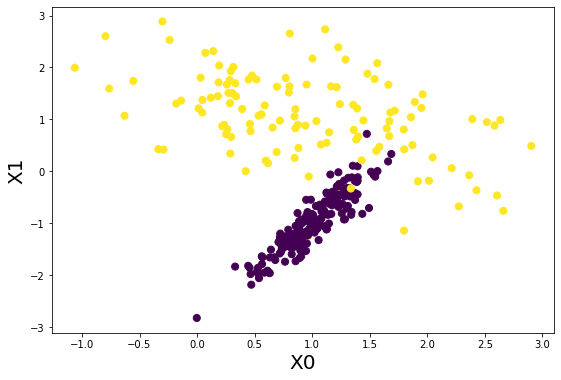

In [50]:
X, y = datasets.make_classification(n_samples=300, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, weights=[0.5, 0.3], random_state=42)
fig, ax = plt.subplots(figsize=(9, 6))
plt.xlabel("X0", fontsize=20)
plt.ylabel("X1", fontsize=20)
plt.scatter(X[:,0], X[:,1], s=50, c=y)
print(X[0])
print(y)

Завдання 2. Навчимо модель та побудуємо графік передбачень.

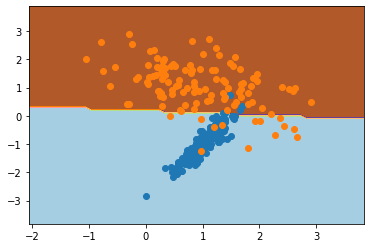

In [61]:

min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

model = LinearDiscriminantAnalysis()

model.fit(X, y)

yhat = model.predict(grid)

predictions = model.predict(X)

zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')

for class_value in range(2):
	row_ix = where(y == class_value)
	plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

plt.show()

Завдання 3. Порахуємо метрики.

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, predictions)

TN, FP, FN, TP = confusion_matrix(y, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  107
False Positive(FP) =  5
True Negative(TN)  =  175
False Negative(FN) =  13
Accuracy of the binary classification = 0.940


Висновок: у цій лабораторній роботі я навчився будувати графіки для класифікації з різними параметрами, навчати модель та за домогою неї будувати передбачення, рахувати метрики.